##證交所

In [2]:
import requests
import pandas as pd
import datetime

In [9]:
stock_id = '2303'

date = datetime.date.today().strftime("%Y%m%d")

print('今天日期：', date)

# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240920&stockNo=2002&response=json&_=1726847389181
url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}"
stock_data = requests.get(url)

json_data = stock_data.json()

df = pd.DataFrame(data=json_data['data'], columns=json_data['fields'])

df

今天日期： 20240920


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"35,096,170","1,936,319,833",55.60,55.60,54.80,55.40,-0.10,"10,816"
1,113/09/03,"27,896,571","1,542,192,127",55.20,55.60,55.00,55.10,-0.30,"7,645"
2,113/09/04,"85,748,502","4,574,666,003",53.00,54.10,52.30,53.30,-1.80,"31,144"
3,113/09/05,"37,783,857","2,041,606,336",53.90,54.60,53.60,53.90,+0.60,"10,951"
4,113/09/06,"24,617,263","1,337,850,400",54.30,54.50,53.60,54.50,+0.60,"8,368"
5,113/09/09,"46,437,090","2,480,087,923",52.90,53.80,52.60,53.80,-0.70,"12,827"
6,113/09/10,"34,262,285","1,824,628,704",53.80,53.80,52.90,53.30,-0.50,"13,169"
7,113/09/11,"24,122,229","1,298,680,795",53.30,54.00,53.20,54.00,+0.70,"7,614"
8,113/09/12,"35,327,391","1,946,021,545",55.10,55.40,54.90,55.20,+1.20,"16,058"
9,113/09/13,"30,635,902","1,672,171,622",55.20,55.30,54.30,54.60,-0.60,"13,103"


##Yahoo Finance

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

stock_id = '2330.TW'
# Yahoo Finance 的股票頁面 URL，這裡以台積電 (2330.TW) 為例
url = f"https://finance.yahoo.com/quote/{stock_id}"

# 添加 headers 模擬瀏覽器請求
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 發送 GET 請求獲取頁面內容
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# 定義一個函數來處理可能的 NoneType 情況
def get_text_safe(tag):
    return tag.text if tag else 'N/A'

# 找到包含即時價格的標籤
price_tag = soup.find('fin-streamer', {'data-field': 'regularMarketPrice'})
price = get_text_safe(price_tag)

# 找到其他股價資訊，如開盤價、最高價、最低價等
open_tag = soup.find('fin-streamer', {'data-field': 'regularMarketOpen'})
open_price = get_text_safe(open_tag)

high_tag = soup.find('fin-streamer', {'data-field': 'regularMarketDayRange'})
high_low = get_text_safe(high_tag).split(' - ')
low_price = high_low[0] if len(high_low) == 2 else 'N/A'
high_price = high_low[1] if len(high_low) == 2 else 'N/A'

previous_close_tag = soup.find('fin-streamer', {'data-field': 'regularMarketPreviousClose'})
previous_close = get_text_safe(previous_close_tag)

volume_tag = soup.find('fin-streamer', {'data-field': 'regularMarketVolume'})
volume = get_text_safe(volume_tag)

# 計算漲跌，如果價格和前日收盤價是可用的
try:
    price_float = float(price.replace(',', ''))
    previous_close_float = float(previous_close.replace(',', ''))
    change = price_float - previous_close_float
except ValueError:
    change = 'N/A'

# 今日日期
today_date = datetime.now().strftime("%Y-%m-%d")

# 創建 DataFrame 表格
data = {
    "日期": [today_date],
    "股票代號": [stock_id],
    "開盤價": [open_price],
    "最高價": [high_price],
    "最低價": [low_price],
    "收盤價": [price],
    "漲跌": [change],
    "成交量": [volume]
}

df = pd.DataFrame(data)

df


,日期,股票代號,開盤價,最高價,最低價,收盤價,漲跌,成交量
0,2024-09-20,2330.TW,981.00,982.00,971.00,973.00,13.0,"62,565,165"


##yfinance

In [14]:
import yfinance as yf

# 輸入股票代號，這裡以台積電 (2330.TW) 為例
ticker = "2330.TW"

# 使用 yfinance 獲取股票資訊
stock = yf.Ticker(ticker)

stock_info = stock.history(period="1d")

# 獲取今日股價的開盤價、最高價、最低價、收盤價和成交量
open_price = stock_info['Open'][0]
high_price = stock_info['High'][0]
low_price = stock_info['Low'][0]
close_price = stock_info['Close'][0]
volume = stock_info['Volume'][0]

# 計算漲跌
previous_close = stock.info['previousClose']
change = close_price - previous_close

# 今日日期
today_date = datetime.date.today().strftime("%Y-%m-%d")

# 創建 DataFrame 表格
data = {
    "日期": [today_date],
    "股票代號": [ticker],
    "開盤價": [open_price],
    "最高價": [high_price],
    "最低價": [low_price],
    "收盤價": [close_price],
    "漲跌": [change],
    "成交量": [volume]
}

df = pd.DataFrame(data)

df

<ipython-input-14-c9729cd2cf6f>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  open_price = stock_info['Open'][0]
<ipython-input-14-c9729cd2cf6f>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  high_price = stock_info['High'][0]
<ipython-input-14-c9729cd2cf6f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  low_price = stock_info['Low'][0]
<ipython-input-14-c9729cd2cf6f>:15: FutureWarning: Series.__getitem__ treating keys as 

,日期,股票代號,開盤價,最高價,最低價,收盤價,漲跌,成交量
0,2024-09-20,2330.TW,981.0,982.0,971.0,973.0,13.0,62565165


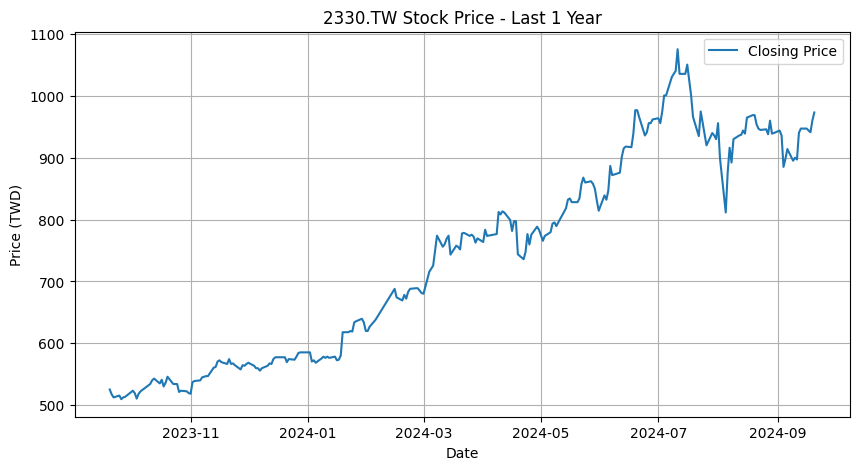

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# 爬取 Yahoo Finance 上的股價資料
ticker = "2330.TW"  # 台積電的股票代號
stock_data = yf.Ticker(ticker)

# 獲取最近 1 年的歷史數據
historical_data = stock_data.history(period="1y")

# 可視化股價走勢
plt.figure(figsize=(10, 5))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (TWD)')
plt.legend()
plt.grid(True)
plt.show()
